In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
my_dataset=load_dataset('lukebarousse/data_jobs')

In [3]:
df=my_dataset['train'].to_pandas()

In [4]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [5]:
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
import seaborn as sns

In [9]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_location']=='United States')].copy()

In [10]:
df_DA_US=df_DA_US.dropna(subset='salary_year_avg')

In [11]:
df_DA_US=df_DA_US.explode('job_skills')

In [13]:
df_DA_US_toppay=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).head(10)

In [14]:
df_DA_US_toppay

,count,median
job_skills,,
pytorch,1,220000.0
jira,1,190000.0
atlassian,1,190000.0
unity,1,169833.5
git,1,147500.0
snowflake,2,132225.0
spss,1,119550.0
c#,1,119550.0
perl,1,119550.0


In [33]:
df_DA_US_topskill=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10)

In [36]:
df_DA_US_topskill=df_DA_US_topskill.sort_values(by='median', ascending=False)

In [37]:
df_DA_US_topskill

,count,median
job_skills,,
power bi,10,106400.00
python,15,100000.00
sas,4,93525.00
sql,20,88500.00
tableau,16,88500.00
r,8,88500.00
excel,14,82258.75
sharepoint,5,77017.50
powerpoint,3,75067.50


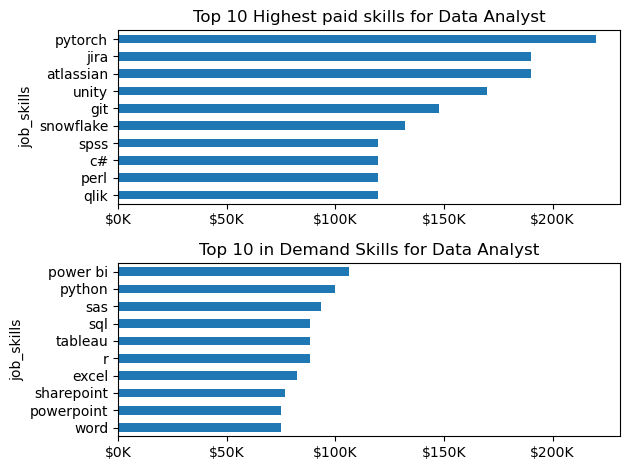

In [43]:
fig, ax=plt.subplots(2,1)
df_DA_US_toppay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest paid skills for Data Analyst')
ax[0].ylabel=''
ax[0].xlabel=''
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
df_DA_US_topskill[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 in Demand Skills for Data Analyst')
ax[1].ylabel=''
ax[1].xlabel='Median Salary in USD'
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.tight_layout()


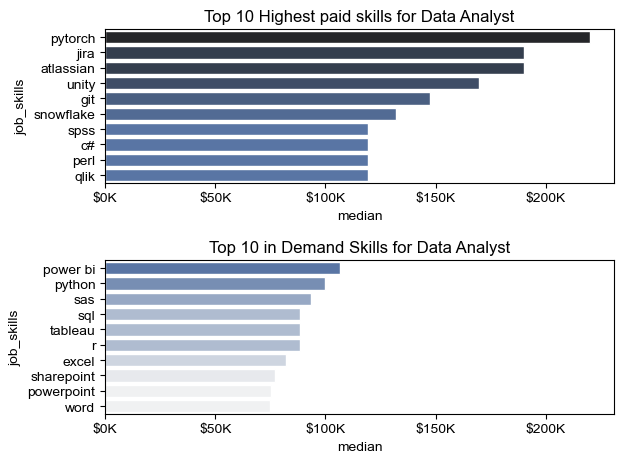

In [53]:
fig, ax=plt.subplots(2,1)
sns.set_theme(style='ticks')
##df_DA_US_toppay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
sns.barplot(data=df_DA_US_toppay, x='median', y=df_DA_US_toppay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)

ax[0].set_title('Top 10 Highest paid skills for Data Analyst')
ax[0].ylabel=''
ax[0].xlabel=''
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


##df_DA_US_topskill[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)

sns.barplot(data=df_DA_US_topskill, x='median', y=df_DA_US_topskill.index, ax=ax[1], hue='median', palette='light:b', legend=False)
ax[1].set_title('Top 10 in Demand Skills for Data Analyst')
ax[1].ylabel=''
ax[1].xlabel='Median Salary in USD'
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.tight_layout()

In [54]:
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
18059,Data Analyst,Data Management Analyst - Avendra,United States,via Ai-Jobs.net,Full-time,False,"Texas, United States",2023-12-16 13:02:31,False,False,United States,year,54000.0,NaN,Aramark,sql,"{'analyst_tools': ['excel', 'ms access'], 'pro..."
18059,Data Analyst,Data Management Analyst - Avendra,United States,via Ai-Jobs.net,Full-time,False,"Texas, United States",2023-12-16 13:02:31,False,False,United States,year,54000.0,NaN,Aramark,excel,"{'analyst_tools': ['excel', 'ms access'], 'pro..."
18059,Data Analyst,Data Management Analyst - Avendra,United States,via Ai-Jobs.net,Full-time,False,"Texas, United States",2023-12-16 13:02:31,False,False,United States,year,54000.0,NaN,Aramark,ms access,"{'analyst_tools': ['excel', 'ms access'], 'pro..."
19941,Data Analyst,Session Lead (External Contractor) - Data Anal...,United States,via Ai-Jobs.net,Part-time,False,"Texas, United States",2023-07-25 13:04:46,True,False,United States,year,100500.0,NaN,"Udacity, Inc.",python,"{'libraries': ['numpy', 'pandas'], 'programmin..."
19941,Data Analyst,Session Lead (External Contractor) - Data Anal...,United States,via Ai-Jobs.net,Part-time,False,"Texas, United States",2023-07-25 13:04:46,True,False,United States,year,100500.0,NaN,"Udacity, Inc.",sql,"{'libraries': ['numpy', 'pandas'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754319,Data Analyst,Finance Master Data Analyst,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-12-21 20:53:32,False,False,Sudan,year,89204.0,NaN,Nestlé,excel,{'analyst_tools': ['excel']}
771454,Data Analyst,Data Analyst,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-06-21 02:00:05,False,False,Sudan,year,100500.0,NaN,Govini,python,"{'programming': ['python', 'r']}"
771454,Data Analyst,Data Analyst,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-06-21 02:00:05,False,False,Sudan,year,100500.0,NaN,Govini,r,"{'programming': ['python', 'r']}"
771915,Data Analyst,Provider Data Analyst,United States,via Ai-Jobs.net,Full-time,False,Sudan,2023-11-17 01:40:02,False,False,Sudan,year,69900.0,NaN,Health Care Service Corporation,word,"{'analyst_tools': ['word', 'excel']}"
